In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [55]:
data = pd.read_csv('../input/world-happiness-report-2019.csv')

In [56]:
data.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [57]:
data.describe()

,Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP per capita,Healthy life expectancy
count,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000
mean,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
std,45.177428,45.177428,44.888751,44.888751,44.888751,44.888751,42.868014,44.888751,44.022721,43.445368
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,39.750000,39.750000,39.500000,39.500000,39.500000,39.500000,37.750000,39.500000,38.750000,38.250000
50%,78.500000,78.500000,78.000000,78.000000,78.000000,78.000000,74.500000,78.000000,76.500000,75.500000
75%,117.250000,117.250000,116.500000,116.500000,116.500000,116.500000,111.250000,116.500000,114.250000,112.750000
max,156.000000,156.000000,155.000000,155.000000,155.000000,155.000000,148.000000,155.000000,152.000000,150.000000


In [58]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             1
Negative affect             1
Social support              1
Freedom                     1
Corruption                  8
Generosity                  1
Log of GDP\nper capita      4
Healthy life\nexpectancy    6
dtype: int64

In [59]:
data.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [60]:
from sklearn.preprocessing import Imputer

In [61]:
imputer = Imputer(missing_values='NaN', strategy='median', axis=0)

In [62]:
data.iloc[:, 3:11] = imputer.fit_transform(data.iloc[:, 3:11])

In [63]:
data.isnull().sum()

Country (region)            0
Ladder                      0
SD of Ladder                0
Positive affect             0
Negative affect             0
Social support              0
Freedom                     0
Corruption                  0
Generosity                  0
Log of GDP\nper capita      0
Healthy life\nexpectancy    0
dtype: int64

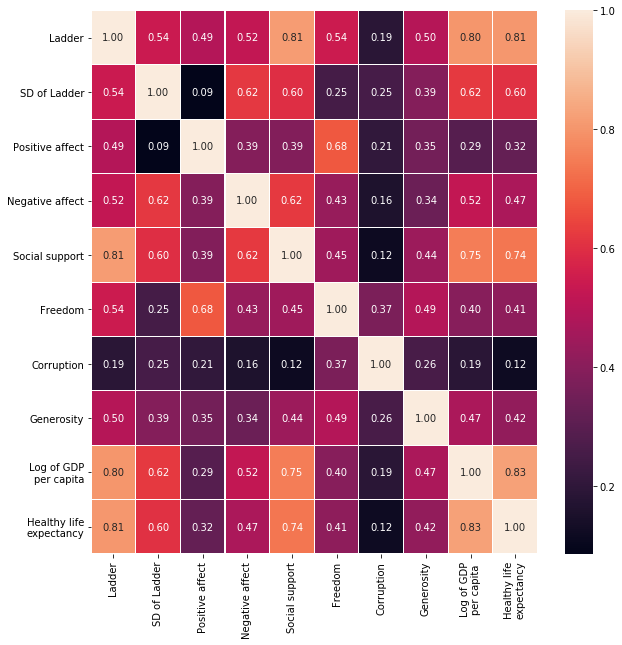

In [64]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),ax=ax,annot=True,linewidth=0.05,fmt='.2f')

Text(0, 0.5, 'Negative affect')

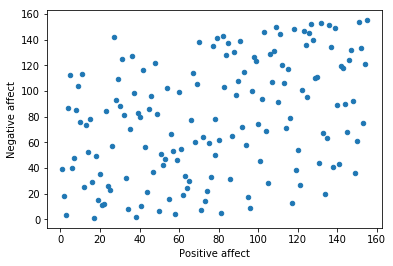

In [65]:
data.plot(x='Positive affect', y='Negative affect', kind='scatter')
plt.xlabel('Positive affect')
plt.ylabel('Negative affect')

Text(0, 0.5, 'Freedom')

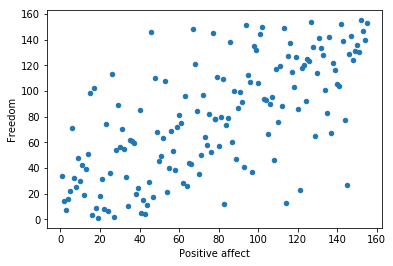

In [66]:
data.plot(x='Positive affect', y='Freedom', kind='scatter')
plt.xlabel('Positive affect')
plt.ylabel('Freedom')

Text(0, 0.5, 'Generosity')

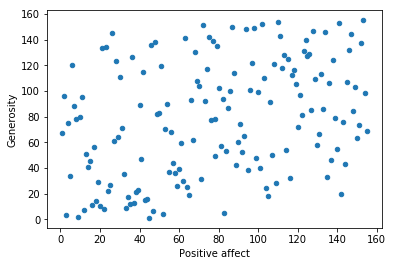

In [67]:
data.plot(x='Positive affect', y='Generosity', kind='scatter')
plt.xlabel('Positive affect')
plt.ylabel('Generosity')

Text(0, 0.5, 'Corruption')

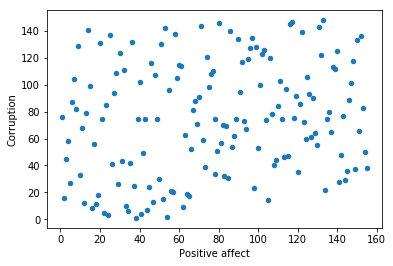

In [68]:
data.plot(x='Positive affect', y='Corruption', kind='scatter')
plt.xlabel('Positive affect')
plt.ylabel('Corruption')

Text(0, 0.5, 'SD of Ladder')

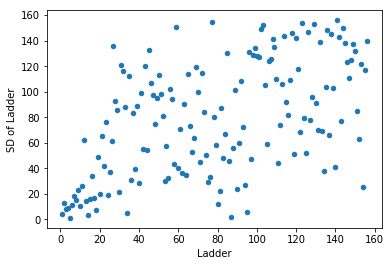

In [69]:
data.plot(x='Ladder', y='SD of Ladder', kind='scatter')
plt.xlabel('Ladder')
plt.ylabel('SD of Ladder')

In [70]:
X = data.drop(['Country (region)', 'Healthy life\nexpectancy'], axis=1)
y = data['Healthy life\nexpectancy']

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [74]:
y_pred = linreg.predict(X_test)
print('r2 score: ', r2_score(y_test, y_pred))

r2 score:  0.5691596906521843
